In [1]:
import numpy as np

a = np.array([1,2,3,4,5])

print(a)


[1 2 3 4 5]


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.


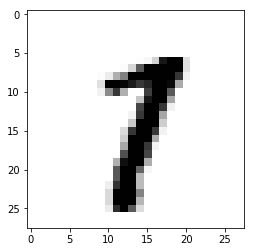

NN predicted 7


In [6]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
from random import randint

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
num = randint(0, mnist.test.images.shape[0])
img = mnist.test.images[num]
#tf.placeholder(tf.float32,[]) tf.float32 is the 32 bit storage fo Cr computation graph
#[] is for the dimensions of input In this case since its images. No of images is unknown this None as first then the RGB values 
#for color images. Since its grayscale therefore 28*28*1=784 works.
X = tf.placeholder(tf.float32,[None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
init = tf.initialize_all_variables()

#Building the model for the given problem
Y = tf.nn.softmax(tf.matmul(X, W) + b)

#Correct values i.e placeholders of training set
Y_ = tf.placeholder(tf.float32,[None,10])

#Loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

#Success Metrics
is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

#0.003 is the learning rate alpha
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

sess = tf.InteractiveSession()
sess.run(init)

for i in range(1000):
    batch_X,batch_Y = mnist.train.next_batch(100)
    train_data = {X: batch_X, Y_: batch_Y}
    sess.run(train_step, feed_dict=train_data)
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    
    #print(a)
    #print(c)
    
    test_data = {X: mnist.test.images, Y_: mnist.test.labels}
    a,c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    #print(a)
    #print(c)   

classification = sess.run(tf.argmax(Y, 1), feed_dict={X: [img]})
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('NN predicted', classification[0])
#prediction=tf.argmax(Y,1)
#print("predictions", prediction.eval(feed_dict={X: mnist.test.images}, session=sess))